In [2]:
import numpy as np 
import pickle
import itertools
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

data = pd.read_csv('D:\AI\Project\Dataset\Zeros_Ones.csv') 

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

data = pd.read_csv('D:\AI\Project\Dataset\Zeros_Ones.csv') 

data.loc[data['labels']=='teardrop', 'labels'] = 'teardrop attack'
data.loc[data['labels']=='neptune', 'labels'] = 'neptune attack'
data.loc[data['labels']=='smurf', 'labels'] = 'smurf attack'
data.loc[data['labels']=='back', 'labels'] = 'back attack'
data.loc[data['labels']=='warezclient', 'labels'] = 'wazerclient attack'
data.loc[data['labels']=='ipsweep', 'labels'] = 'ipsweep attack'
data.loc[data['labels']=='portsweep', 'labels'] = 'portsweep attack'
data.loc[data['labels']=='satan', 'labels'] = 'satan attack'
data.loc[data['labels']=='guess_passwd', 'labels'] = 'guesspassword attack'
data.loc[data['labels']=='labels', 'labels'] = 'normal behaviour'




label_encoder = LabelEncoder()
data_encoded = data.apply(label_encoder.fit_transform)

X = data_encoded.drop('labels', axis=1) 
y = data_encoded['labels'] 
data
y




label_encoder = LabelEncoder()
data_encoded = data.apply(label_encoder.fit_transform)

X = data_encoded.drop('labels', axis=1) 
y = data_encoded['labels'] 
data
y

0       9
1       9
2       9
3       9
4       9
       ..
5552    4
5553    4
5554    4
5555    4
5556    4
Name: labels, Length: 5557, dtype: int32

In [4]:
label_encoder = LabelEncoder()
data_encoded = data.apply(label_encoder.fit_transform)

X = data_encoded.drop('labels', axis=1) 
y = data_encoded['labels']  

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler



le=LabelEncoder()

y = data['labels']
X = data.drop(columns=['labels'])
selected_features = ['duration', 'dst_bytes', 'src_bytes', 'is_guest_login', 'is_host_login', 'diff_srv_rate', 'srv_diff_host_rate', 'flag', 'protocol_type']
X = X[selected_features]
X['protocol_type']=le.fit_transform(X['protocol_type'].astype("str"))
X['flag']=le.fit_transform(X['flag'].astype("str"))
# X['flag'].value_counts() 
y
# SF      3069
# REJ     1500
# RSTR     716
# RSTO     168
# S0        96
# S1         8

0       wazerclient attack
1       wazerclient attack
2       wazerclient attack
3       wazerclient attack
4       wazerclient attack
               ...        
5552                normal
5553                normal
5554                normal
5555                normal
5556                normal
Name: labels, Length: 5557, dtype: object

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Perform PCA with 9 principal components
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

# Step 6: Print the 9 principal components
print("Nine Principal Components:")
print(X_pca)
attribute_names = X.columns
print(attribute_names[:9]) 


Nine Principal Components:
[[-1.53177753e+00 -7.49609481e-01  5.33559687e-01 ...  7.06540051e-01
   5.98964479e-01 -5.76848290e-16]
 [ 1.38471243e+00 -8.99173905e-01 -1.79006363e-01 ...  7.04278184e-01
   3.04612698e-01 -1.01982120e-16]
 [-1.49346890e+00 -8.34345726e-01 -4.66522968e-01 ...  2.34985383e-01
   5.43090836e-01 -1.29045785e-16]
 ...
 [-1.20661400e+00 -4.45301531e-02 -2.40627408e+00 ...  2.30780187e-01
   5.95047489e-01  4.34947107e-17]
 [ 1.61067967e+00 -1.47229032e-01 -2.31878500e+00 ...  2.84167138e-01
   5.76826823e-01  3.48845412e-17]
 [-1.20660965e+00 -4.45174508e-02 -2.40627782e+00 ...  2.30810135e-01
   5.95042937e-01  6.68802747e-17]]
Index(['duration', 'dst_bytes', 'src_bytes', 'is_guest_login', 'is_host_login',
       'diff_srv_rate', 'srv_diff_host_rate', 'flag', 'protocol_type'],
      dtype='object')


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
print(X_train.shape)
print(X_test.shape)

(3889, 9)
(1668, 9)


In [7]:
base_classifiers = [
    ('decision_tree', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier(n_neighbors=1)),
]

from sklearn.ensemble import StackingClassifier

stacking_classifier = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=RandomForestClassifier(n_estimators =12, random_state=6) 
)

stacking_classifier.fit(X_train, y_train)

y_pred = stacking_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# cm = confusion_matrix(y_test, y_pred)
# cm

Accuracy: 0.9850119904076738


In [8]:
import sklearn.metrics

print(sklearn.metrics.classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

         back attack       1.00      1.00      1.00        51
guesspassword attack       1.00      1.00      1.00        16
      ipsweep attack       0.98      0.97      0.97       241
      neptune attack       1.00      0.98      0.99       168
              normal       0.98      0.98      0.98       215
    portsweep attack       0.98      0.99      0.98       334
        satan attack       0.98      1.00      0.99       195
        smurf attack       1.00      0.97      0.98       120
     teardrop attack       0.99      1.00      1.00       173
  wazerclient attack       0.97      1.00      0.99       155

            accuracy                           0.99      1668
           macro avg       0.99      0.99      0.99      1668
        weighted avg       0.99      0.99      0.98      1668



In [9]:
import pickle

pickle.dump(stacking_classifier,open('stacking.pkl','wb'))

pickle.dump(pca, open('principal.pkl', 'wb'))

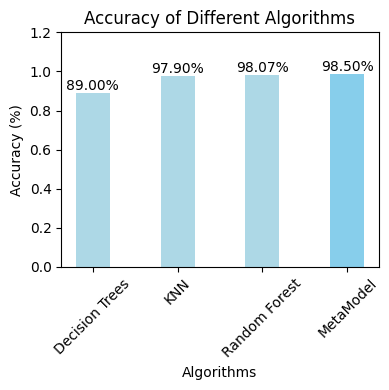

In [10]:
import matplotlib.pyplot as plt

algorithms = ['Decision Trees', 'KNN', 'Random Forest', 'MetaModel']

accuracy_scores = [0.89, 0.9790, 0.9807, accuracy]

colors = ['lightblue' if algo != 'MetaModel' else 'skyblue' for algo in algorithms]
plt.figure(figsize=(4, 4))
bars = plt.bar(algorithms, accuracy_scores, color=colors, width=0.4)

plt.title('Accuracy of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')  



plt.xticks(rotation=45)  
plt.ylim(0, 1.2)  

for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score*100:.2f}%', ha='center', va='bottom')

plt.tight_layout() 
plt.show()


In [11]:
import pandas as pd

# Sample data
data = {'Mertics' : ['precision', 'recall', 'f1-score'],
    'back attack': [1.00, 1.00, 1.00],
        'guesspassword attack': [1.00, 1.00, 1.00],
        'ipsweep attack': [0.98, 0.98, 0.98],
        'neptune attack': [0.98, 0.98, 0.98],
        'normal': [1.00, 0.98, 0.99],
        'portsweep attack': [0.98, 0.99, 0.98],
        'satan attack': [1.00, 1.00, 1.00],
        'smurf attack': [1.00, 0.97, 0.98],
        'teardrop attack': [0.99, 1.00, 1.00],
        'wazerclient attack': [0.97, 1.00, 0.99]
}

# Creating DataFrame
df = pd.DataFrame(data, index = None)

# Displaying DataFrame
df


,Mertics,back attack,guesspassword attack,ipsweep attack,neptune attack,normal,portsweep attack,satan attack,smurf attack,teardrop attack,wazerclient attack
0,precision,1.0,1.0,0.98,0.98,1.00,0.98,1.0,1.00,0.99,0.97
1,recall,1.0,1.0,0.98,0.98,0.98,0.99,1.0,0.97,1.00,1.00
2,f1-score,1.0,1.0,0.98,0.98,0.99,0.98,1.0,0.98,1.00,0.99


In [12]:
import pandas as pd

# Sample data
data = {
    'algorithms' : ['Decision Trees', 'KNN', 'Random Forest','<b>MetaModel</b>'],

'accuracy_scores' : [89, 97.90, 98.07, accuracy*100]
}

# Creating DataFrame without the default index column
df = pd.DataFrame(data)

# Displaying DataFrame
df


,algorithms,accuracy_scores
0,Decision Trees,89.000000
1,KNN,97.900000
2,Random Forest,98.070000
3,<b>MetaModel</b>,98.501199


In [13]:
import pandas as pd

# Sample data
data = {
    'algorithms': ['Decision Trees', 'KNN', 'Random Forest', '<b>MetaModel</b>'],
    'accuracy_scores': [89, 97.90, 98.07, accuracy * 100]
}

# Creating DataFrame without the default index column
df = pd.DataFrame(data)

# Displaying DataFrame with MetaModel text bolded
from IPython.display import display
display(df.style.format({'accuracy_scores': '{:.2f}%'}))


,algorithms,accuracy_scores
0,Decision Trees,89.00%
1,KNN,97.90%
2,Random Forest,98.07%
3,MetaModel,98.50%


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [15]:
import sklearn.metrics
print(sklearn.metrics.classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

         back attack       1.00      1.00      1.00        51
guesspassword attack       1.00      1.00      1.00        16
      ipsweep attack       0.98      0.97      0.97       241
      neptune attack       1.00      0.98      0.99       168
              normal       0.98      0.98      0.98       215
    portsweep attack       0.98      0.99      0.98       334
        satan attack       0.98      1.00      0.99       195
        smurf attack       1.00      0.97      0.98       120
     teardrop attack       0.99      1.00      1.00       173
  wazerclient attack       0.97      1.00      0.99       155

            accuracy                           0.99      1668
           macro avg       0.99      0.99      0.99      1668
        weighted avg       0.99      0.99      0.98      1668



In [16]:
from sklearn.tree import DecisionTreeClassifier
tree =  DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
import sklearn.metrics
print(sklearn.metrics.classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

         back attack       1.00      1.00      1.00        51
guesspassword attack       1.00      1.00      1.00        16
      ipsweep attack       0.98      0.97      0.97       241
      neptune attack       1.00      0.98      0.99       168
              normal       0.98      0.98      0.98       215
    portsweep attack       0.98      0.99      0.98       334
        satan attack       0.98      1.00      0.99       195
        smurf attack       1.00      0.97      0.98       120
     teardrop attack       0.99      1.00      1.00       173
  wazerclient attack       0.97      1.00      0.99       155

            accuracy                           0.99      1668
           macro avg       0.99      0.99      0.99      1668
        weighted avg       0.99      0.99      0.98      1668



In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1,random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1, random_state=0)

In [19]:
import sklearn.metrics
print(sklearn.metrics.classification_report(y_test, y_pred))


                      precision    recall  f1-score   support

         back attack       1.00      1.00      1.00        51
guesspassword attack       1.00      1.00      1.00        16
      ipsweep attack       0.98      0.97      0.97       241
      neptune attack       1.00      0.98      0.99       168
              normal       0.98      0.98      0.98       215
    portsweep attack       0.98      0.99      0.98       334
        satan attack       0.98      1.00      0.99       195
        smurf attack       1.00      0.97      0.98       120
     teardrop attack       0.99      1.00      1.00       173
  wazerclient attack       0.97      1.00      0.99       155

            accuracy                           0.99      1668
           macro avg       0.99      0.99      0.99      1668
        weighted avg       0.99      0.99      0.98      1668



In [20]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[ 51,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  16,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 233,   0,   4,   4,   0,   0,   0,   0],
       [  0,   0,   0, 164,   0,   4,   0,   0,   0,   0],
       [  0,   0,   0,   0, 210,   0,   0,   0,   1,   4],
       [  0,   0,   0,   0,   0, 330,   4,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 195,   0,   0,   0],
       [  0,   0,   4,   0,   0,   0,   0, 116,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 155]], dtype=int64)

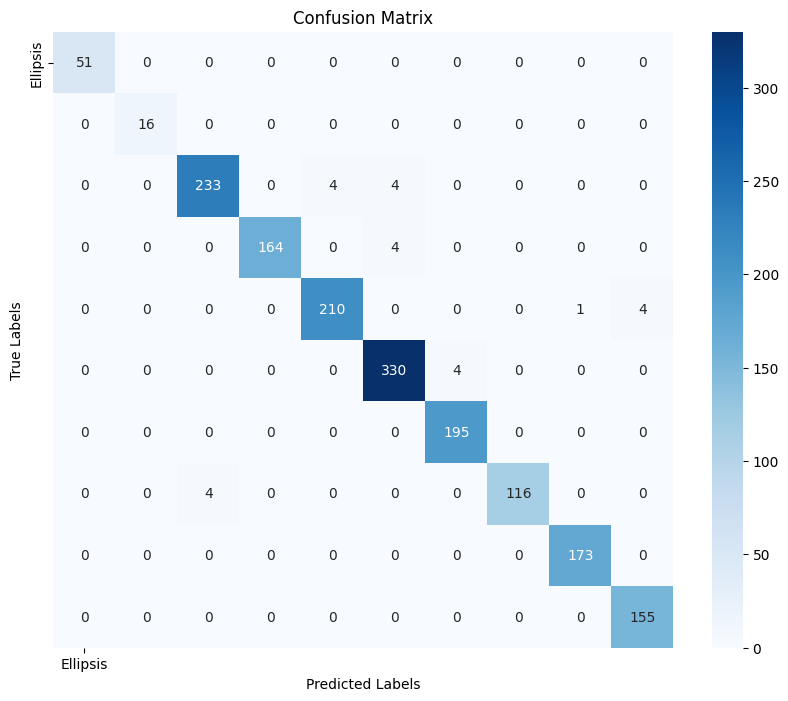

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=[...], yticklabels=[...])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()